# Анализ рынка недвижимости Санкт-Петербурга

## 1. Обзор данных

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### 1.1 Функции <a id="1.1"></a>

#### 1.1.1 Функция для первичного анализа <a id="1.1.1"></a>

In [2]:
def first_rev(df):
    print('info')
    display(df.info(memory_usage='deep'))
    print('describe')
    display(df.describe().T.round(3))
    print('head')
    display(df.head())
    print('duplicated')
    display(df.duplicated().sum())

#### 1.1.2 Функция для определения типа этажа <a id="1.1.2"></a>

In [3]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

#### 1.1.3 Функция для конвертирования типа этажа в численное значение <a id="1.1.3"></a>

In [4]:
def floor_type_int(row):
    if row['floor_type'] == 'первый':
        return 1
    if row['floor_type'] == 'последний':
        return 3
    return 2

### 1.2 Данные <a id="1.2"></a>

In [5]:
df = pd.read_csv(r"C:\Users\csvic\Desktop\data analysis\Я.Практикум\Модуль 1\Проекты\real_estate_data.csv", sep='\t')

In [6]:
first_rev(df)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_neare

None

describe


,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858,5.683000e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6541548.772,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,60.349,3.565400e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.071,1.078000e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771,1.261000e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,10.674,6.597000e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,34.458,2.203000e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892,4.885000e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,10.570,5.905000e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150,1.071000e+00,0.0,0.00,1.00,2.0,5.0


head


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


duplicated


0

### 1.3 Вывод
В таблице 22 столбца.

Согласно документации к данным:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, которые не относятся к жилому фонду, но имеют необходимые условия для проживания.

## 2. Предобработка данных

### 2.1 Стиль заголовков
В названиях столбцов видны два нарушения стиля:
1. Строчные буквы сочетаются с прописными.
2. Не соблюдается змеиный регистр.

In [7]:
# перечень названий столбцов таблицы df
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [8]:
# переименование столбцов
df = df.rename(columns={
    'cityCenters_nearest':'city_сenters_nearest',
    'parks_around3000':'parks_around_3000',
    'ponds_around3000':'ponds_around_3000'
    }
)

In [9]:
# проверка результата - перечень названий столбцов
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### 2.1.1 Вывод
Изменили стиль заголовкой для трех параметров.

### 2.2 Дубликаты

Проверка на дубликаты в датафрейме.

In [10]:
# подсчет явных дубликатов
df.duplicated().sum()

0

#### 2.2.1 Вывод
Проверили и не обнаружили дубликаты.

### 2.3 Пропуски значений

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

In [11]:
# подсчет пропусков
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### 2.3.1 Удаление строк с пропусками
Строки с пропусками по двум столбцам можно удалить, так как их мало — `floors_total` (86 пропусков), `locality_name` (49 пропусков).

In [12]:
# удаление пропусков
df = df.dropna(subset=['floors_total', 'locality_name']).reset_index(drop=True)

##### 2.3.1.1 Вывод
Удалили данные с пропусками по 2 столбцам, так как их мало и не получится заполнить какими-либо значениями (`floors_total`, `locality_name`).

#### 2.3.2 Замена пропусков на 'unknown'
Пропуски в `is_apartment` заменили на 'unknown', так как не нашли убедительной причины пропусков в этих данных.

In [13]:
# замена пропущенных значений на 'unknown'
df['is_apartment'] = df['is_apartment'].fillna('unknown')

##### 2.3.2.1 Вывод
Заменили пропуски на 'unknown' по в столбце с булевым значением (`is_apartment`).

#### 2.3.3 Замена пропусков на 0
1. `balcony` — число балконов. Если человек не указал число балконов — скорее всего, их нет.
2. `parks_around_3000` — число парков в радиусе 3 км. Пропуски в данных значат, что в пределах 3км нет парков.
3. `ponds_around_3000` — число водоёмов в радиусе 3 км. Пропуски в данных значат, что в пределах 3км нет водоемов.
4. `days_exposition` — сколько дней было размещено объявление (от публикации до снятия). Пропущенные значения связаны с тем, что объяление еще размещено или с тем, что объявление забыли снять с публикации.

In [14]:
# перебор названий столбцов в цикле и замена пропущенных значений на 0
columns_to_replace = [
    'balcony',
    'parks_around_3000',
    'ponds_around_3000',
    'days_exposition'
]
for colomns in columns_to_replace:
    df[colomns] = df[colomns].fillna(0)

##### 2.3.3.1 Вывод
Заменили пропуски на 0 в 4 столбцах (`balcony`, `parks_around_3000`, `ponds_around_3000`, `days_exposition`).

#### 2.3.4 Замена пропусков на среднее значение
1. `ceiling_height` — высота потолков (м). Заменим пропуски на среднее значение по выборке в зависимости от этажности.
2. `living_area` — жилая площадь в квадратных метрах (м²). Заменим пропуски с помощью вычисления жилой площади через общую площадь и среднее соотношение жилой к общей площади по выборке.
3. `kitchen_area` — площадь кухни в квадратных метрах (м²). Заменим пропуски с помощью вычисления площади кухни через общую площадь и среднее соотношение площади кухни к общей площади по выборке.

In [15]:
# средняя высота потолка в зависимости от этажности дома
ceiling_height_floors_total = df.groupby('floors_total')['ceiling_height'].transform('mean')

In [16]:
# замена пропусков выботы потолка средним значением в зависимости от этажности дома
df['ceiling_height'] = df['ceiling_height'].fillna(ceiling_height_floors_total)

In [17]:
# соотношение жилой площади к общей по выборке
living_total_area_ratio = df['living_area']/df['total_area']

In [18]:
# замена пропусков жилой площади через общую площадь и среднее соотношение жилой к общей площади по выборке
df['living_area'] = df['living_area'].fillna(df['total_area']*living_total_area_ratio.mean())

In [19]:
# соотношение площади кухни к общей по выборке
kitchen_total_area_ratio = df['kitchen_area']/df['total_area']

In [20]:
# замена пропусков площади кухни через общую площадь и среднее соотношение площади кухни к общей по выборке
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area']*kitchen_total_area_ratio.mean())

In [21]:
df[(df['kitchen_area'] + df['living_area']) > df['total_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.650000,9.0,26.10,5,unknown,...,6.200000,0.0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
422,14,11500000.0,98.00,2016-05-10T00:00:00,3,2.650000,3.0,88.00,3,False,...,18.359281,1.0,Санкт-Петербург,39363.0,13270.0,0.0,NaN,0.0,NaN,90.0
438,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.749145,17.0,24.75,4,unknown,...,5.078777,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
542,9,4700000.0,23.80,2018-12-28T00:00:00,1,2.704582,18.0,20.00,9,unknown,...,5.000000,0.0,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
548,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.700000,19.0,30.55,2,unknown,...,9.280000,2.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22121,6,3100000.0,27.30,2018-05-29T00:00:00,0,2.700000,16.0,23.30,15,unknown,...,5.114371,1.0,Санкт-Петербург,41935.0,9551.0,0.0,NaN,0.0,NaN,59.0
22777,9,65000000.0,228.00,2016-06-02T00:00:00,4,2.792865,5.0,200.00,2,unknown,...,42.713428,0.0,Санкт-Петербург,22783.0,1295.0,3.0,619.0,3.0,269.0,0.0
22971,0,5800000.0,66.00,2017-06-09T00:00:00,5,2.792865,5.0,55.50,1,unknown,...,12.364414,0.0,Санкт-Петербург,12007.0,11933.0,0.0,NaN,0.0,NaN,21.0
23060,3,1900000.0,18.90,2016-04-04T00:00:00,1,2.747674,16.0,16.00,12,unknown,...,3.540718,0.0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,115.0


##### 2.3.4.1 Вывод
Заменили пропуски на средние значение в 3 столбцах (`ceiling_height`, `living_area`, `kitchen_area`).

#### 2.3.5 Вывод

**1. Удалили строки с пропусками.**
Удалили данные с пропусками, так как их мало и не получится заполнить какими-либо значениями
* `floors_total` (86 пропусков) — всего этажей в доме.
* `locality_name` (49 пропусков) — название населённого пункта.

**2. Заменили пропуски на 'unknown'.**
* `is_apartment` (20924 пропусков) — апартаменты (булев тип).

**3. Заменили пропуски на 0.**
* `balcony` (11519 пропусков) — число балконов. Если человек не указал число балконов — скорее всего, их нет.
* `parks_around_3000` (5518 пропусков) — число парков в радиусе 3 км. Пропуски в данных значат, что в пределах 3км нет парков.
* `ponds_around_3000` (5518 пропусков) — число водоёмов в радиусе 3 км. Пропуски в данных значат, что в пределах 3км нет водоемов.
* `days_exposition` (3181 пропусков) — сколько дней было размещено объявление (от публикации до снятия). Пропущенные значения связаны с тем, что объяление еще размещено или с тем, что объявление забыли снять с публикации.

**4. Заменили на среднее значение.**
* `ceiling_height` (9195 пропусков) — высота потолков (м). Заменили пропуски на среднее значение по выборке в зависимости от этажности.
* `living_area` (1903 пропусков) — жилая площадь в квадратных метрах (м²). Заменили пропуски с помощью вычисления жилой площади через общую площадь и среднее соотношение жилой к общей площади по выборке.
* `kitchen_area` (2278 пропусков) — площадь кухни в квадратных метрах (м²). Заменили пропуски с помощью вычисления площади кухни через общую площадь и среднее соотношение площади кухни к общей площади по выборке.

**5. Оставили без изменений.**
Возможно, значения не указаны, так как расстояние до объектов выше какого-то порога. Замена не лучший вариант, так как иначе будет сдвиг при распределении. В идеале надо уточнить у разработчиков, как рассчитывались эти расстояния.
* `airports_nearest` (5542 пропусков) — расстояние до ближайшего аэропорта в метрах (м).
* `city_сenters_nearest` (5519 пропусков) — расстояние до центра города (м).
* `parks_nearest` (15620 пропусков) — расстояние до ближайшего парка (м).
* `ponds_nearest` (14589 пропусков) — расстояние до ближайшего водоёма (м).

### 2.4 Тип данных
У части столбцов можно изменить тип данных для удобства анализа.

In [22]:
# получение общей информации о данных в таблице df
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23564 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23565.0,9.878421e+00,5.681156e+00,0.0,6.000000e+00,9.00,1.400000e+01,50.0
last_price,23565.0,6.540058e+06,1.091093e+07,12190.0,3.400000e+06,4646000.00,6.790000e+06,763000000.0
total_area,23565.0,6.032282e+01,3.565706e+01,12.0,4.000000e+01,52.00,6.970000e+01,900.0
rooms,23565.0,2.070656e+00,1.078591e+00,0.0,1.000000e+00,2.00,3.000000e+00,19.0
ceiling_height,23564.0,2.771868e+00,9.953241e-01,1.0,2.599093e+00,2.71,2.792865e+00,100.0
floors_total,23565.0,1.067588e+01,6.594823e+00,1.0,5.000000e+00,9.00,1.600000e+01,60.0
living_area,23565.0,3.456100e+01,2.234604e+01,2.0,1.900000e+01,30.00,4.210000e+01,409.7
floor,23565.0,5.878124e+00,4.871485e+00,1.0,2.000000e+00,4.00,8.000000e+00,33.0
kitchen_area,23565.0,1.056538e+01,6.093199e+00,1.3,7.000000e+00,9.00,1.200000e+01,112.0
balcony,23565.0,5.936771e-01,9.606601e-01,0.0,0.000000e+00,0.00,1.000000e+00,5.0


In [24]:
# изменение столбца `first_day_exposition` на тип данных времени
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

In [25]:
# перебор названий столбцов в цикле и замена данных в тип 'uint8'
columns_to_replace = [
    'total_images',
    'rooms',
    'floors_total',
    'floor',
    'kitchen_area',
    'balcony',
    'parks_around_3000',
    'ponds_around_3000'
]
for columns in columns_to_replace:
    df[columns] = df[columns].astype(np.uint8, errors='ignore')

In [26]:
# перебор названий столбцов в цикле и замена данных в тип 'uint16'
columns_to_replace = [
    'total_area',
    'living_area',
    'parks_nearest',
    'ponds_nearest',
    'days_exposition'
]
for columns in columns_to_replace:
    df[columns] = df[columns].astype(np.uint16, errors='ignore')

In [27]:
# перебор названий столбцов в цикле и замена данных в тип 'uint32'
columns_to_replace = [
    'last_price',
    'airports_nearest',
    'city_сenters_nearest'
]
for columns in columns_to_replace:
    df[columns] = df[columns].astype(np.uint32, errors='ignore')

In [28]:
df.select_dtypes(include=['object']).copy().describe().T

,count,unique,top,freq
is_apartment,23565,3,unknown,20805
locality_name,23565,364,Санкт-Петербург,15651


In [29]:
df['is_apartment'] = df['is_apartment'].astype('category')

In [30]:
# контрольная проверка
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  uint8         
 1   last_price            23565 non-null  uint32        
 2   total_area            23565 non-null  uint16        
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  uint8         
 5   ceiling_height        23564 non-null  float64       
 6   floors_total          23565 non-null  uint8         
 7   living_area           23565 non-null  uint16        
 8   floor                 23565 non-null  uint8         
 9   is_apartment          23565 non-null  category      
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  uint8         
 13  balcony         

#### 2.4.1 Вывод
Изменили тип данных для времени (`first_day_exposition`) и для количественных параметров (`last_price`, `floors_total`, `balcony`, `parks_around_3000`, `ponds_around_3000`, `days_exposition`) на целочисленные значения.

### 2.5 Вывод
Обработали данные датафрейма:

**1. Изменили стиль заголовков для трех параметров (`city_сenters_nearest`, `parks_around_3000`, `ponds_around_3000`).**

**2. Проверили датафрейм на дубликаты.**

**3. Удалили строки с пропусками.**
Удалили данные с пропусками, так как их мало и не получится заполнить какими-либо значениями
* `floors_total` (86 пропусков) — всего этажей в доме.
* `locality_name` (49 пропусков) — название населённого пункта.

**4. Заменили пропуски на 'unknown'.**
* `is_apartment` — апартаменты (булев тип).

**5. Заменили пропуски на 0.**
* `balcony` (11519 пропусков) — число балконов. Если человек не указал число балконов — скорее всего, их нет.
* `parks_around_3000` (5518 пропусков) — число парков в радиусе 3 км. Пропуски в данных значат, что в пределах 3км нет парков.
* `ponds_around_3000` (5518 пропусков) — число водоёмов в радиусе 3 км. Пропуски в данных значат, что в пределах 3км нет водоемов.
* `days_exposition` (3181 пропусков) — сколько дней было размещено объявление (от публикации до снятия). Пропущенные значения связаны с тем, что объяление еще размещено или с тем, что объявление забыли снять с публикации.

**6. Заменили на среднее значение.**
Заменили пропуски на средние значение в 3 столбцах (ceiling_height, living_area, kitchen_area).
* `ceiling_height` (9195 пропусков) — высота потолков (м). Заменили пропуски на среднее значение по выборке в зависимости от этажности.
* `living_area` (1903 пропусков) — жилая площадь в квадратных метрах (м²). Заменили пропуски с помощью вычисления жилой площади через общую площадь и среднее соотношение жилой к общей площади по выборке.
* `kitchen_area` (2278 пропусков) — площадь кухни в квадратных метрах (м²). Заменили пропуски с помощью вычисления площади кухни через общую площадь и среднее соотношение площади кухни к общей площади по выборке.

**7. Оставили без изменений.**
Возможно, значения не указаны, так как расстояние до объектов выше какого-то порога. Замена не лучший вариант, так как иначе будет сдвиг при распределении. В идеале надо уточнить у разработчиков, как рассчитывались эти расстояния.
* `airports_nearest` (5542 пропусков) — расстояние до ближайшего аэропорта в метрах (м).
* `city_сenters_nearest` (5519 пропусков) — расстояние до центра города (м).
* `parks_nearest` (15620 пропусков) — расстояние до ближайшего парка (м).
* `ponds_nearest` (14589 пропусков) — расстояние до ближайшего водоёма (м).

**8. Изменили тип данных** для времени (`first_day_exposition`) и для количественных параметров (`last_price`, `floors_total`, `balcony`, `parks_around_3000`, `ponds_around_3000`, `days_exposition`) на целочисленные значения.

По результатам удалено 0,6% данных выборки.

## 3. Добавление данных в таблицу

In [31]:
# удаление ненужных для анализа столбцов для удобства
df = df.drop(columns=[
    'total_images',
    'balcony',
    'airports_nearest',
    'parks_around_3000',
    'parks_nearest',
    'ponds_around_3000',
    'ponds_nearest',
    'is_apartment',
    'open_plan'], axis = 1)

### 3.1 Расчет цены квадратного метра
Рассчитывается с помощью данных о цене на квартиру (`last_price`) и общего метража (`total_area`).
Предварительно нужно проверить данные на нормальность и убрать 

In [32]:
# цена квадратного метра как соотношение цены квартиры к общей площади квартиры
df['price_square_meter'] = df['last_price'] / df['total_area']

In [33]:
# проверка минимальных значений
df.sort_values(by='price_square_meter').head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,city_сenters_nearest,days_exposition,price_square_meter
8750,12190,109,2019-03-20,2,2.750000,25,32,25,False,40,Санкт-Петербург,9176.0,8,111.834862
14825,430000,54,2018-06-26,2,2.969474,3,30,3,False,10,посёлок станции Свирь,NaN,44,7962.962963
4384,500000,52,2018-08-02,2,2.700000,2,31,1,False,8,Сланцы,NaN,110,9615.384615
11285,550000,54,2019-02-07,2,3.000000,2,40,1,False,7,Сланцы,NaN,78,10185.185185
9535,450000,43,2018-08-31,2,2.792865,5,30,3,False,5,деревня Старополье,NaN,96,10465.116279
23345,1450000,138,2018-07-06,3,3.008028,2,58,2,False,12,Гатчина,NaN,52,10507.246377
23352,470000,44,2018-07-02,2,3.008028,2,28,2,False,7,Сланцы,NaN,298,10681.818182
5670,450000,42,2017-07-31,2,2.740000,1,23,1,False,5,городской посёлок Будогощь,NaN,233,10714.285714
19351,560000,52,2017-11-21,2,3.000000,3,30,3,False,6,Сланцы,NaN,207,10769.230769
9425,850000,78,2017-05-04,3,2.599093,9,12,7,False,8,Гатчина,NaN,169,10897.435897


In [34]:
# проверка максимальных значений
df.sort_values(by='price_square_meter', ascending=False).head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,city_сenters_nearest,days_exposition,price_square_meter
12897,763000000,400,2017-09-30,7,2.685200,10,250,10,False,74,Санкт-Петербург,3956.0,33,1.907500e+06
1431,330000000,190,2018-04-04,3,3.500000,7,95,5,False,40,Санкт-Петербург,1197.0,233,1.736842e+06
22701,289238400,187,2019-03-19,2,3.370000,6,63,6,False,30,Санкт-Петербург,1073.0,0,1.546729e+06
14621,401300000,401,2016-02-20,5,2.599093,9,204,9,False,24,Санкт-Петербург,2389.0,393,1.000748e+06
4971,124000000,124,2017-10-12,4,3.000000,4,67,2,False,20,Санкт-Петербург,1722.0,45,1.000000e+06
16372,245000000,285,2017-04-10,6,3.350000,7,182,4,False,29,Санкт-Петербург,6235.0,249,8.596491e+05
17075,28000000,33,2019-04-30,1,3.500000,5,18,2,False,6,Санкт-Петербург,1462.0,0,8.484848e+05
4835,28000000,33,2019-04-29,1,3.500000,5,18,2,False,6,Санкт-Петербург,1376.0,0,8.484848e+05
16552,122000000,145,2017-04-25,3,3.300000,6,36,2,False,72,Санкт-Петербург,7023.0,335,8.413793e+05
17811,135000000,166,2019-02-07,3,3.300000,7,52,1,False,64,Санкт-Петербург,5955.0,0,8.132530e+05


In [35]:
# удаление строк с минимальным значением и с 3 максимальными значениями, так как они сильно отличаются от остальной выборки
df = df.query('index not in [8750, 12897, 1431, 22701]')

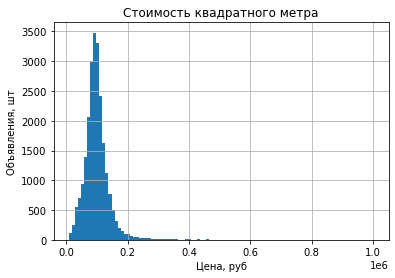

In [36]:
# гистограмма
df.hist(column='price_square_meter', bins=100)
plt.xlabel('Цена, руб')
plt.ylabel('Объявления, шт')
plt.title('Стоимость квадратного метра')
plt.show()

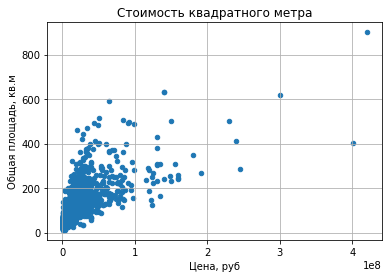

In [37]:
# диаграмма рассеяния для стоимости квартиры и общей площади
df.plot(x='last_price', y='total_area', kind='scatter', grid=True)
plt.xlabel('Цена, руб')
plt.ylabel('Общая площадь, кв.м')
plt.title('Стоимость квадратного метра')
plt.show()

In [38]:
# корреляция между стоимостью квартиры и общей площадью
df['last_price'].corr(df['total_area'])

0.7239915397573039

In [39]:
# список характерных значений
df['price_square_meter'].describe().astype(int)

count      23561
mean       99653
std        47000
min         7962
25%        76923
50%        95454
75%       114864
max      1000748
Name: price_square_meter, dtype: int32

#### 3.1.1 Вывод
Добавили в датафрейм новый столбец с данными о цене квадратного метра (`price_square_meter`), рассчитанного как соотношение стоимости квартиры к общей площади.
1. Удалили 4 строки: с минимальным значением и с 3 максимальными значениями, так как они сильно отличаются от остальной выборки.
2. Квартильный размах между 76 744 руб и 112 903 руб. На гистограмме видно, что это **нормальное распределение с большим количеством выбросов в правой стороне.**
3. По корреляции видно, что есть **сильная зависимость между стоимостью квартиры и общей площадью**. Но диаграмма рассеяния показывает, что **чем выше стоимость и площадь, тем больший разброс в данных.**
4. Средняя цена за квадратный метр: 99 202 руб. Стандартное отклонение: 46 883 руб, что составляет почти половину от средней цены за квадратный метр. Это говорит о большом разбросе данных. **Необходимо категоризировать данные и изучать цены на квадратный метр в совокупности с другими параметрами, например, районом, удаленностью от центра города и др.**
5. Большой размах между минимальным (7 962) и максимальным значением (1 000 748 руб). Указанные значения выглядят как правдоподобные. Это значит, что данные необходимо категоризировать.

### 3.2 Этаж квартиры
Категоризировать данные и объединить их в варианты — первый, последний, другой.

In [40]:
# добавление столбца с данными о категории этажа квартиры
df['floor_type'] = df.apply(floor_type, axis=1)

In [41]:
# проверка результата
df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,city_сenters_nearest,days_exposition,price_square_meter,floor_type
0,13000000,108,2019-03-07,3,2.700000,16,51,8,False,25,Санкт-Петербург,16028.0,0,120370.370370,другой
1,3350000,40,2018-12-04,1,2.782385,11,18,1,False,11,посёлок Шушары,18603.0,81,83750.000000,первый
2,5196000,56,2015-08-20,2,2.792865,5,34,4,False,8,Санкт-Петербург,13933.0,558,92785.714286,другой
3,64900000,159,2015-07-24,3,2.731545,14,89,9,False,29,Санкт-Петербург,6800.0,424,408176.100629,другой
4,10000000,100,2018-06-19,2,3.030000,14,32,13,False,41,Санкт-Петербург,8098.0,121,100000.000000,другой


#### 3.2.1 Вывод
Добавили новый столбец с типом этажа квартиры (`floor_type`) — категоризировали данные и объединить их в варианты — 'первый', 'последний', 'другой'.

### 3.3 Соотношения площадей

#### 3.3.1 Соотношение жилой и общей площади

In [42]:
# соотношение жилой площади к общей 
# рекомендованным промежутком для данного соотношения является показатель от 0,5 до 0,7
df['living_total_area_ratio'] = df['living_area'] / df['total_area']
df['living_total_area_ratio'].mean()

0.5622196862607525

In [43]:
# проверка минимальных значений
df.sort_values(by='living_total_area_ratio').head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,city_сenters_nearest,days_exposition,price_square_meter,floor_type,living_total_area_ratio
23442,64990000,139,2015-11-24,3,3.000000,8,3,8,False,16,Санкт-Петербург,5975.0,280,467553.956835,последний,0.021583
13837,6350000,52,2018-02-06,2,3.000000,6,2,2,False,9,Санкт-Петербург,6521.0,91,122115.384615,другой,0.038462
21818,6100000,77,2019-02-28,4,2.500000,9,5,1,False,9,Санкт-Петербург,11270.0,33,79220.779221,первый,0.064935
3228,4440000,41,2017-07-02,1,2.749145,17,3,17,False,11,Санкт-Петербург,13073.0,216,108292.682927,последний,0.073171
21634,2330000,23,2018-01-01,0,2.852037,24,2,22,True,4,посёлок Мурино,NaN,66,101304.347826,другой,0.086957
2301,4200000,62,2017-06-15,2,2.600000,9,8,6,False,41,посёлок Шушары,29448.0,111,67741.935484,другой,0.129032
23262,1600000,92,2018-07-10,3,3.000000,6,13,1,False,10,Санкт-Петербург,4465.0,3,17391.304348,первый,0.141304
9425,850000,78,2017-05-04,3,2.599093,9,12,7,False,8,Гатчина,NaN,169,10897.435897,другой,0.153846
6909,14400000,100,2015-09-24,1,2.792865,5,16,1,False,43,Санкт-Петербург,14931.0,0,144000.000000,первый,0.160000
20877,8900000,50,2018-10-22,2,2.500000,7,8,3,False,31,Санкт-Петербург,8301.0,0,178000.000000,другой,0.160000


In [44]:
# проверка максимальных значений
df.sort_values(by='living_total_area_ratio', ascending=False).head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,city_сenters_nearest,days_exposition,price_square_meter,floor_type,living_total_area_ratio
12620,3700000,24,2017-11-10,0,2.778731,19,24,13,False,4,Санкт-Петербург,16840.0,74,154166.666667,другой,1.000000
10547,2950000,25,2017-11-17,0,2.776597,25,25,11,False,4,Санкт-Петербург,13222.0,51,118000.000000,другой,1.000000
9814,2350000,25,2017-12-03,0,2.731560,22,25,17,False,4,посёлок Мурино,NaN,13,94000.000000,другой,1.000000
15427,3500000,33,2014-12-26,1,2.675556,27,33,15,False,9,посёлок Парголово,18900.0,940,106060.606061,другой,1.000000
20143,13351000,102,2018-07-03,6,3.400000,4,101,1,False,19,Санкт-Петербург,5464.0,229,130892.156863,первый,0.990196
1985,4000000,37,2018-02-11,1,2.530000,16,36,10,False,8,Санкт-Петербург,21690.0,74,108108.108108,другой,0.972973
4318,6900000,72,2019-03-25,3,3.500000,4,70,1,False,13,Санкт-Петербург,4466.0,22,95833.333333,первый,0.972222
3873,2600000,70,2017-07-29,3,2.500000,5,68,5,False,9,Любань,NaN,45,37142.857143,последний,0.971429
548,3100000,31,2018-03-08,1,2.700000,19,30,2,False,9,посёлок Мурино,NaN,70,100000.000000,другой,0.967742
21109,8200000,71,2017-07-21,0,5.800000,5,68,5,True,13,Санкт-Петербург,1261.0,30,115492.957746,последний,0.957746


In [45]:
# проверка доли выборки с минимальным соотношением
df['living_total_area_ratio'][df['living_total_area_ratio'] < 0.4].count() / df.shape[0]

0.05700097618946564

In [46]:
# проверка доли выборки с максимальным соотношением
df['living_total_area_ratio'][df['living_total_area_ratio'] > 0.8].count() / df.shape[0]

0.007767072704893681

In [47]:
# удаление данных с некорректным соотношением
df = df.query('0.8 > living_total_area_ratio > 0.4')

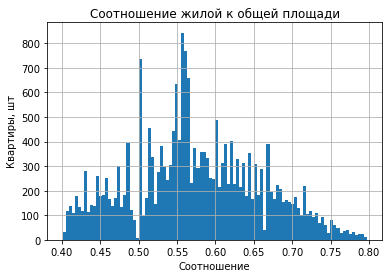

In [48]:
# гистограмма
df.hist(column='living_total_area_ratio', bins=100)
plt.xlabel('Соотношение')
plt.ylabel('Квартиры, шт')
plt.title('Соотношение жилой к общей площади')
plt.show()

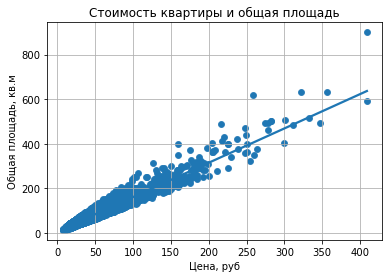

In [49]:
# диаграмма рассеяния для стоимости квартиры и общей площади
df.plot(x='living_area', y='total_area', kind='scatter', grid=True)
sns.regplot(x=df['living_area'], y=df['total_area'], ci=None)
plt.xlabel('Цена, руб')
plt.ylabel('Общая площадь, кв.м')
plt.title('Стоимость квартиры и общая площадь')
plt.show()

In [50]:
# корреляция между стоимостью квартиры и общей площадью
df['living_area'].corr(df['total_area'])

0.9650360030631081

In [51]:
# список характерных значений
df['living_total_area_ratio'].describe().round(2)

count    21861.00
mean         0.57
std          0.08
min          0.40
25%          0.52
50%          0.57
75%          0.63
max          0.80
Name: living_total_area_ratio, dtype: float64

###### 3.3.1.1 Вывод
Добавили в датафрейм новый столбец соотношения жилой к общей площади (`living_total_area_ratio`).
1. Рекомендованным промежутком для данного соотношения является показатель от 0,5 до 0,7. Расширили данный показатель до 0,4-0,8 и удалили данные, выходящие за указанные рамки (удалили 6,5% выборки).
2. Квартильный размах между 0.4 и 0.63. На гистограмме видно, что это **нормальное распределение.**
3. По корреляции видно, что есть **прямая зависимость между общей и жилой площадью**. Диаграмма рассеяния показывает, что **на крайних значения есть разброс в данных.**
4. Среднее значение: 0.58. Стандартное отклонение: 0.08. Медиана: 0.56. Данные нормальные.

#### 3.3.2 Соотношение площади кухни и общей площади

In [52]:
# соотношение площади кухни к общей
df['kitchen_total_area_ratio'] = df['kitchen_area'] / df['total_area']

C:\Users\csvic\AppData\Local\Temp/ipykernel_11400/2926532576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kitchen_total_area_ratio'] = df['kitchen_area'] / df['total_area']


In [53]:
# список характерных значений
df['kitchen_total_area_ratio'].describe()

count    21861.000000
mean         0.175057
std          0.059933
min          0.025381
25%          0.132075
50%          0.166667
75%          0.205882
max          0.787879
Name: kitchen_total_area_ratio, dtype: float64

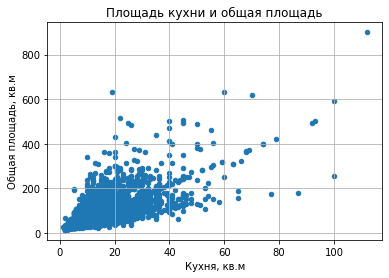

In [54]:
# диаграмма рассеяния для площади кухни и общей площади
df.plot(x='kitchen_area', y='total_area', kind='scatter', grid=True)
plt.xlabel('Кухня, кв.м')
plt.ylabel('Общая площадь, кв.м')
plt.title('Площадь кухни и общая площадь')
plt.show()

In [55]:
# проверка минимальных значений
df.sort_values(by='kitchen_total_area_ratio').head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,city_сenters_nearest,days_exposition,price_square_meter,floor_type,living_total_area_ratio,kitchen_total_area_ratio
3351,22190000,197,2017-11-20,7,2.900000,6,107,1,False,5,Санкт-Петербург,1211.0,130,112639.593909,первый,0.543147,0.025381
4414,22190000,191,2017-12-05,8,2.900000,6,115,1,False,5,Санкт-Петербург,1152.0,115,116178.010471,первый,0.602094,0.026178
20703,73900000,342,2015-06-18,5,2.985909,4,187,2,False,10,Санкт-Петербург,5544.0,377,216081.871345,другой,0.546784,0.029240
12787,140000000,631,2019-04-09,7,3.900000,4,322,4,False,19,Санкт-Петербург,4972.0,0,221870.047544,последний,0.510301,0.030111
7909,5967734,66,2017-02-07,2,2.985909,4,44,2,False,2,Санкт-Петербург,20802.0,335,90420.212121,другой,0.666667,0.030303
20105,4250000,28,2019-05-01,1,2.800000,14,19,10,False,1,Санкт-Петербург,12721.0,0,151785.714286,другой,0.678571,0.035714
3253,25092624,266,2015-12-08,5,3.000000,3,155,1,False,11,Санкт-Петербург,5065.0,660,94333.172932,первый,0.582707,0.041353
9504,23500000,313,2017-02-13,9,3.200000,6,179,5,False,13,Санкт-Петербург,10138.0,0,75079.872204,другой,0.571885,0.041534
19855,13545000,238,2019-01-30,3,2.778731,19,134,4,False,10,Санкт-Петербург,4579.0,35,56911.764706,другой,0.563025,0.042017
4216,50000000,517,2017-10-14,7,2.985909,4,332,3,False,22,Санкт-Петербург,1847.0,0,96711.798839,другой,0.642166,0.042553


In [56]:
# проверка максимальных значений
df.sort_values(by='kitchen_total_area_ratio', ascending=False).head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,city_сenters_nearest,days_exposition,price_square_meter,floor_type,living_total_area_ratio,kitchen_total_area_ratio
11511,4300000,33,2016-05-13,1,2.747674,16,26,14,False,26,Санкт-Петербург,12702.0,180,130303.030303,другой,0.787879,0.787879
1402,3250000,24,2018-06-29,1,2.776597,25,18,16,False,18,Санкт-Петербург,16414.0,96,135416.666667,другой,0.750000,0.750000
12410,3000000,60,2017-10-04,3,2.600000,9,34,2,False,43,Коммунар,NaN,234,50000.000000,другой,0.566667,0.716667
7715,1811250,20,2016-03-28,1,2.650000,24,14,13,False,14,поселок Мурино,NaN,98,90562.500000,другой,0.700000,0.700000
692,3364930,34,2014-11-27,1,2.640000,25,23,25,False,23,Санкт-Петербург,12153.0,574,98968.529412,последний,0.676471,0.676471
21148,8800000,60,2018-07-23,2,3.150000,6,35,4,False,35,Санкт-Петербург,8089.0,0,146666.666667,другой,0.583333,0.583333
10665,3000000,25,2017-05-24,1,2.700000,18,14,13,False,14,посёлок Мурино,NaN,558,120000.000000,другой,0.560000,0.560000
10335,2650000,48,2017-12-23,1,3.000000,4,27,2,False,26,Выборг,NaN,43,55208.333333,другой,0.562500,0.541667
5707,5900000,37,2019-01-22,1,2.800000,22,17,11,False,20,Санкт-Петербург,14693.0,70,159459.459459,другой,0.459459,0.540541
11095,4900000,42,2018-07-25,2,2.500000,5,27,3,False,21,Санкт-Петербург,9252.0,14,116666.666667,другой,0.642857,0.500000


In [57]:
# проверка доли выборки с минимальным соотношением
df['kitchen_total_area_ratio'][df['kitchen_total_area_ratio'] < 0.09].count() / df.shape[0]

0.032843877224280685

In [58]:
# проверка доли выборки с максимальным соотношением
df['kitchen_total_area_ratio'][df['kitchen_total_area_ratio'] > 0.4].count() / df.shape[0]

0.003339279996340515

In [59]:
# удаление данных с некорректным соотношением
df = df.query('0.4 > kitchen_total_area_ratio > 0.09')

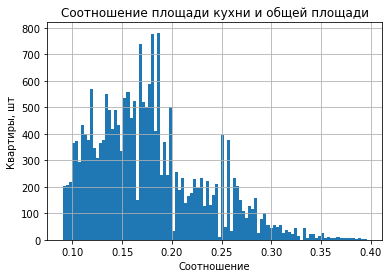

In [60]:
# гистограмма
df.hist(column='kitchen_total_area_ratio', bins=100)
plt.xlabel('Соотношение')
plt.ylabel('Квартиры, шт')
plt.title('Соотношение площади кухни и общей площади')
plt.show()

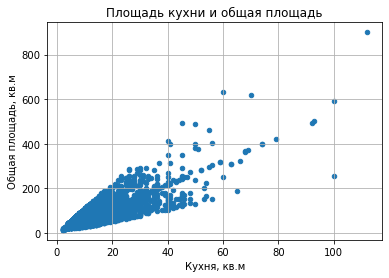

In [61]:
# диаграмма рассеяния для площади кухни и общей площади
df.plot(x='kitchen_area', y='total_area', kind='scatter', grid=True)
plt.xlabel('Кухня, кв.м')
plt.ylabel('Общая площадь, кв.м')
plt.title('Площадь кухни и общая площадь')
plt.show()

In [62]:
# корреляция между стоимостью квартиры и общей площадью
df['kitchen_area'].corr(df['total_area'])

0.7846918329744331

In [63]:
# список характерных значений
df['kitchen_total_area_ratio'].describe().round(2)

count    21061.00
mean         0.18
std          0.06
min          0.09
25%          0.13
50%          0.17
75%          0.21
max          0.40
Name: kitchen_total_area_ratio, dtype: float64

###### 3.3.2.1 Вывод
Добавили в датафрейм новый столбец соотношения площади кухни к общей площади (`kitchen_total_area_ratio`).
1. Первичный анализ показал разброс значений. Удалили данные выходящие за рамки 0,09-0.3 (удалили 3% выборки).
2. Квартильный размах между 0.14 и 0.21. На гистограмме видно, что это **нормальное распределение c разбросом значений в правой части.**
3. По корреляции видно, что есть **сильная зависимость между площадью кухни и общей площадью**. Диаграмма рассеяния показывает, что **на крайних значения есть разброс в данных.**
4. Среднее значение: 0.18. Стандартное отклонение: 0.06. Медиана: 0.18. Данные нормальные.

### 3.4 Вывод
1. Добавили в датафрейм **новый столбец с данными о цене квадратного метра (`price_square_meter`)**, рассчитанного как соотношение стоимости квартиры к общей площади.
* Нормальное распределение с большим количеством выбросов в правой стороне.
* Сильная зависимость между стоимостью квартиры и общей площадью. Но чем выше стоимость и площадь, тем больший разброс в данных.
* Средняя цена за квадратный метр: 99 202 руб. Стандартное отклонение составляет почти половину от средней цены за квадратный метр. Необходимо категоризировать данные и изучать цены на квадратный метр в совокупности с другими параметрами, например, районом, удаленностью от центра города и др.

2. Добавили **новый столбец с типом этажа квартиры (`floor_type`)** — категоризировали данные и объединить их в варианты — 'первый', 'последний', 'другой'.

3. Добавили в датафрейм **новый столбец соотношения жилой к общей площади (`living_total_area_ratio`).**
* Рекомендованным промежутком для данного соотношения является показатель от 0,5 до 0,7. Расширили данный показатель до 0,4-0,8 и удалили данные выходящие за указанные рамки.
* Нормальное распределение данных.
* Прямая зависимость между общей и жилой площадью. На крайних значения есть разброс в данных.

4. Добавили в датафрейм **новый столбец соотношения площади кухни к общей площади (`kitchen_total_area_ratio`).**
* Первичный анализ показал разброс значений. Удалили данные выходящие за рамки 0,09-0.3.
* Нормальное распределение c разбросом значений в правой части.
* Сильная зависимость между площадью кухни и общей площадью. На крайних значения есть разброс в данных.

По результатам удалено 6% данных выборки.

## 4. Исследовательский анализ данных

### 4.1 Общий исследовательский анализ
Изучение параметров: площадь (`total_area`), цена (`last_price`), число комнат (`rooms`), высота потолков (`ceiling_height`).

In [64]:
# создание датафейрма с параметрами
df_main_filtered = df[['total_area', 'last_price', 'rooms', 'ceiling_height']]

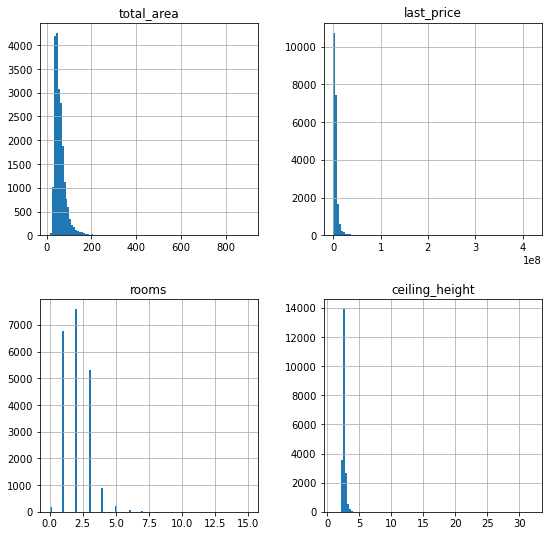

In [65]:
# гистограммы параметров
df_main_filtered.hist(bins=100, figsize=(9, 9))
plt.show()

In [66]:
df_main_filtered.corr()

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.735523,0.765754,0.105524
last_price,0.735523,1.000000,0.415150,0.083338
rooms,0.765754,0.415150,1.000000,0.062549
ceiling_height,0.105524,0.083338,0.062549,1.000000


#### 4.1.1 Вывод

Проанализировали параметры: площадь (`total_area`), цена (`last_price`), число комнат (`rooms`), высота потолков (`ceiling_height`).
1. Сильная зависимость между стоимостью квартиры и площадью. Но чем выше значения каждого параметра, тем больше разброс (видно на гистограмме с распределением Пуассона для обоих параметров).
2. Больше всего в выборе 1, 2 и 3 комнатных квартир. Количество комнат влияет на площадь квартиры, но имеет только среднее влияние на стоимость. Также надо проверить данные на нормальность, так как из гистограммы видно, что присутствуют нулевые значения.
3. Высота потолков никак не влияет на стоимость, площадь или количество комнат в квартире.

### 4.2 Время продажи квартиры

In [67]:
# создание датафейрма с параметрами
df_filtered_days_exposition = df.query('days_exposition >= 1')

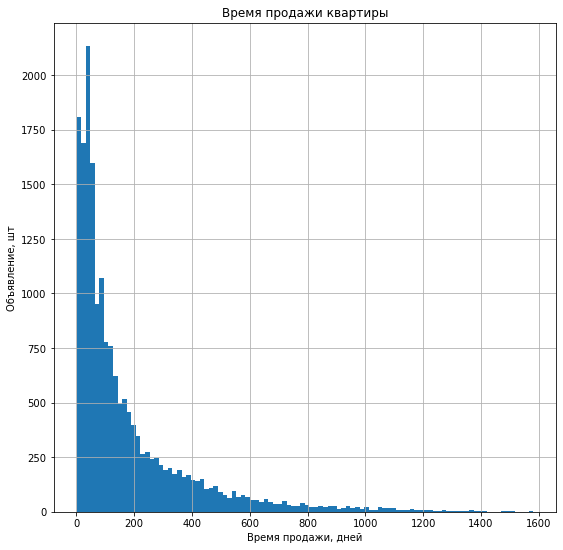

In [68]:
# гистограмма
df_filtered_days_exposition['days_exposition'].hist(bins=100, figsize=(9, 9))
plt.xlabel('Время продажи, дней')
plt.ylabel('Объявление, шт')
plt.title('Время продажи квартиры')
plt.show()

In [69]:
# список характерных значений
df_filtered_days_exposition['days_exposition'].describe().astype(int)

count    18279
mean       178
std        217
min          1
25%         44
50%         93
75%        227
max       1580
Name: days_exposition, dtype: int32

In [70]:
# список самых частых значений
df_filtered_days_exposition['days_exposition'].value_counts()

45      820
60      504
7       214
30      186
90      183
       ... 
1037      1
673       1
644       1
1293      1
971       1
Name: days_exposition, Length: 1108, dtype: int64

In [71]:
# проверка минимальных значений
df_filtered_days_exposition.sort_values(by='days_exposition').head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,city_сenters_nearest,days_exposition,price_square_meter,floor_type,living_total_area_ratio,kitchen_total_area_ratio
1627,4000000,49,2019-05-01,2,2.500000,9,25,1,False,10,Санкт-Петербург,14384.0,1,81632.653061,первый,0.510204,0.204082
16123,7806000,25,2019-04-30,1,3.000000,5,14,5,False,4,Санкт-Петербург,10302.0,2,312240.000000,последний,0.560000,0.160000
15964,4070000,45,2019-04-30,2,2.792865,5,22,3,False,6,Санкт-Петербург,11668.0,2,90444.444444,другой,0.488889,0.133333
12987,6100000,51,2019-04-29,2,3.000000,5,31,4,False,6,Санкт-Петербург,9389.0,2,119607.843137,другой,0.607843,0.117647
3508,3200000,38,2018-10-27,1,2.600000,9,17,4,False,8,Коммунар,NaN,3,84210.526316,другой,0.447368,0.210526
19808,2340000,25,2017-09-29,0,2.776597,25,18,13,False,4,деревня Кудрово,NaN,3,93600.000000,другой,0.720000,0.160000
579,3500000,38,2017-07-10,2,2.599093,9,21,8,False,7,Санкт-Петербург,12575.0,3,92105.263158,другой,0.552632,0.184211
18921,9499000,81,2017-09-10,2,2.747674,16,41,6,False,14,Санкт-Петербург,16186.0,3,117271.604938,другой,0.506173,0.172840
948,3800000,37,2017-09-10,1,2.852037,24,17,2,False,11,посёлок Мурино,NaN,3,102702.702703,другой,0.459459,0.297297
5169,6200000,54,2018-04-06,2,2.600000,13,32,10,False,10,Санкт-Петербург,15030.0,3,114814.814815,другой,0.592593,0.185185


In [72]:
# проверка максимальных значений
df_filtered_days_exposition.sort_values(by='days_exposition', ascending=False).head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,city_сenters_nearest,days_exposition,price_square_meter,floor_type,living_total_area_ratio,kitchen_total_area_ratio
18739,3500000,48,2014-12-15,2,2.500000,5,27,2,False,7,деревня Новое Девяткино,NaN,1580,72916.666667,другой,0.562500,0.145833
1104,34878556,95,2014-12-09,2,3.121343,6,58,5,False,20,Санкт-Петербург,318.0,1572,367142.694737,другой,0.610526,0.210526
9507,10600000,80,2014-12-09,3,2.850000,17,44,9,False,15,Санкт-Петербург,17110.0,1553,132500.000000,другой,0.550000,0.187500
1879,13300000,79,2014-12-09,2,3.000000,8,42,7,False,18,Санкт-Петербург,11096.0,1513,168354.430380,другой,0.531646,0.227848
6657,4400000,42,2014-12-12,1,2.792865,5,18,1,False,11,Пушкин,30358.0,1512,104761.904762,первый,0.428571,0.261905
20852,13300000,133,2015-02-11,4,3.000000,5,58,2,False,45,Санкт-Петербург,5032.0,1512,100000.000000,другой,0.436090,0.338346
14014,9500000,100,2015-02-19,4,3.000000,5,76,5,False,10,Санкт-Петербург,4798.0,1497,95000.000000,последний,0.760000,0.100000
15227,9278000,139,2014-12-28,4,2.800000,5,78,4,False,26,Сестрорецк,35515.0,1489,66748.201439,другой,0.561151,0.187050
19017,5990000,82,2015-02-19,3,3.000000,4,60,2,False,8,Павловск,34619.0,1485,73048.780488,другой,0.731707,0.097561
11887,11400000,76,2014-12-09,2,2.599093,9,36,3,False,14,Санкт-Петербург,11096.0,1484,150000.000000,другой,0.473684,0.184211


In [73]:
# проверка доли выборки с временем продажи более чем полтора года
df_filtered_days_exposition['days_exposition'][df_filtered_days_exposition['days_exposition'] > 546].count() / df.shape[0]

0.06125065286548597

In [74]:
# удаление данных со слишком долгими продажами
df_filtered_days_exposition = df_filtered_days_exposition.query('days_exposition < 546')

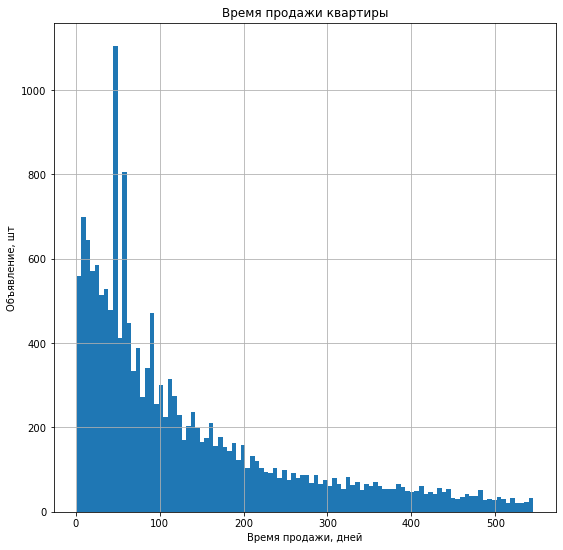

In [75]:
# повторная гистограмма
df_filtered_days_exposition['days_exposition'].hist(bins=100, figsize=(9, 9))
plt.xlabel('Время продажи, дней')
plt.ylabel('Объявление, шт')
plt.title('Время продажи квартиры')
plt.show()

In [76]:
# повторный список характерных значений
df_filtered_days_exposition['days_exposition'].describe().astype(int)

count    16982
mean       131
std        126
min          1
25%         41
50%         85
75%        185
max        545
Name: days_exposition, dtype: int32

#### 4.2.1 Вывод

1. Сделали отдельный датафрейм с временем продажи квартиры без нулевых значений. Как говорили выше, нулевые значения вероятно связана с тем, что квартира еще не продана или пользователь забыл снять объявление с публикации.
2. Первичный анализ показал распределение Пуассона с большим количеством выбросов в правой части. Наблюдается большой размах от минимального (1 день) и максимального (1580 дней) значений. Также большой разброс между средним (178), медианой (93) и 3 самыми частыми значениями (45, 60 и 7). При этом стандартное отклонение превышает среднее значение (218). В результате **удалили данные с продажей более чем 1,5 года.**
3. Повторный анализ также показал распределение Пуассона с выбросами на 45 и 60 дней. Мы уже заметили, что это самые частые значения в выборке. Характерные данные стали лучше, хотя все равно показывают разброс данных между средним (126), медианой (85) и стандартным отклонением, почти равным среднему значению (126).
4. **Необходимо категоризировать данные по другим параметрам.**

### 4.3 Редкие и выбивающиеся значения

#### 4.3.1 Высота потолков

In [77]:
# проверка минимальных значений
df.sort_values(by='ceiling_height').head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,city_сenters_nearest,days_exposition,price_square_meter,floor_type,living_total_area_ratio,kitchen_total_area_ratio
22463,6000000,55,2018-10-31,2,1.00,12,32,7,False,10,Санкт-Петербург,14217.0,13,109090.909091,другой,0.581818,0.181818
5683,1500000,42,2017-08-14,2,1.20,2,27,1,False,5,городской посёлок Мга,NaN,248,35714.285714,первый,0.642857,0.119048
16837,4100000,40,2017-10-17,1,1.75,37,17,5,False,8,Санкт-Петербург,20444.0,71,102500.000000,другой,0.425000,0.200000
5820,1650000,35,2018-05-29,1,2.00,5,20,5,False,6,Луга,NaN,100,47142.857143,последний,0.571429,0.171429
549,2999000,33,2017-03-30,1,2.00,15,17,6,False,6,Санкт-Петербург,11746.0,270,90878.787879,другой,0.515152,0.181818
11286,3300000,36,2017-06-18,1,2.00,17,15,12,False,10,посёлок Металлострой,26980.0,53,91666.666667,другой,0.416667,0.277778
4191,2120000,35,2017-12-18,1,2.00,18,16,9,False,8,Тосно,NaN,36,60571.428571,другой,0.457143,0.228571
16357,12300000,88,2019-03-12,3,2.00,5,63,2,False,12,Санкт-Петербург,7675.0,0,139772.727273,другой,0.715909,0.136364
16787,1500000,33,2018-10-03,1,2.00,5,20,5,False,6,Выборг,NaN,6,45454.545455,последний,0.606061,0.181818
2563,2400000,62,2018-12-27,3,2.00,5,40,4,False,6,Луга,NaN,0,38709.677419,другой,0.645161,0.096774


In [78]:
# удалим строки с высотой потолков меньше 1,7 метра
df = df.query('index not in [22590, 5683]')

In [79]:
# проверка максимальных значений
df.sort_values(by='ceiling_height', ascending=False).head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,city_сenters_nearest,days_exposition,price_square_meter,floor_type,living_total_area_ratio,kitchen_total_area_ratio
3134,2900000,75,2018-11-12,3,32.0,3,53,2,False,8,Волхов,NaN,0,38666.666667,другой,0.706667,0.106667
22211,9999000,92,2019-04-05,2,32.0,6,55,5,False,16,Санкт-Петербург,3506.0,0,108684.782609,другой,0.597826,0.173913
4852,3000000,25,2017-09-27,0,27.0,25,17,17,False,4,посёлок Мурино,NaN,28,120000.000000,другой,0.680000,0.160000
17756,3900000,56,2017-12-22,3,27.0,5,33,4,False,10,Санкт-Петербург,15543.0,73,69642.857143,другой,0.589286,0.178571
10713,3800000,58,2017-10-13,2,27.0,10,30,3,False,8,посёлок Мурино,NaN,71,65517.241379,другой,0.517241,0.137931
22807,4000000,98,2018-03-15,4,27.0,2,73,2,False,9,деревня Нижняя,NaN,27,40816.326531,последний,0.744898,0.091837
5219,2500000,54,2017-10-13,2,27.0,5,30,3,False,9,деревня Мины,NaN,540,46296.296296,другой,0.555556,0.166667
5777,8150000,80,2019-01-09,2,27.0,36,41,13,False,12,Санкт-Петербург,20444.0,38,101875.000000,другой,0.512500,0.150000
20364,8000000,45,2017-07-18,1,27.0,4,22,2,False,10,Санкт-Петербург,3246.0,429,177777.777778,другой,0.488889,0.222222
5641,4400000,50,2017-08-08,2,26.0,9,21,3,False,7,Санкт-Петербург,10912.0,267,88000.000000,другой,0.420000,0.140000


In [80]:
# количество строк с высотой потолков больше 6 метров
df['ceiling_height'][df['ceiling_height'] > 6].count()

25

In [81]:
# удаление строк с высотой потолков больше 6 метров
df = df.query('ceiling_height < 6')

##### 4.3.1.1 Вывод
Удалили 2 низких и 25 высоких значения и оставили высоту потолоков в пределах 1,7-5.8 метров.

#### 4.3.2 Количество комнат

In [82]:
# проверка минимальных значений
df.sort_values(by='rooms').head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,city_сenters_nearest,days_exposition,price_square_meter,floor_type,living_total_area_ratio,kitchen_total_area_ratio
19971,16300000,98,2017-11-08,0,3.100000,5,60,2,True,18,Санкт-Петербург,5819.0,537,166326.530612,другой,0.612245,0.183673
17940,2950000,25,2017-12-09,0,2.731545,14,16,9,False,4,Санкт-Петербург,12102.0,45,118000.000000,другой,0.640000,0.160000
22446,2250000,24,2017-09-28,0,2.640258,12,15,3,False,4,городской посёлок Новоселье,NaN,45,93750.000000,другой,0.625000,0.166667
20676,3600000,27,2017-11-10,0,2.852037,24,19,23,False,5,Санкт-Петербург,12099.0,74,133333.333333,другой,0.703704,0.185185
1523,1950000,31,2019-01-29,0,2.704582,18,18,11,True,5,Никольское,NaN,0,62903.225806,другой,0.580645,0.161290
17926,3500000,31,2019-04-17,0,2.776597,25,17,2,True,5,Санкт-Петербург,16788.0,0,112903.225806,другой,0.548387,0.161290
9913,2200000,23,2018-02-01,0,2.747674,16,16,12,True,4,посёлок Мурино,NaN,32,95652.173913,другой,0.695652,0.173913
17386,4100000,26,2017-11-26,0,2.946322,7,17,3,True,4,Санкт-Петербург,14361.0,30,157692.307692,другой,0.653846,0.153846
23422,3350000,26,2018-09-07,0,2.778731,19,14,8,True,4,Санкт-Петербург,17092.0,31,128846.153846,другой,0.538462,0.153846
776,2600000,26,2018-02-20,0,2.704582,18,14,8,False,4,посёлок Мурино,NaN,45,100000.000000,другой,0.538462,0.153846


In [83]:
# проверка максимальных значений
df.sort_values(by='rooms', ascending=False).head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,city_сenters_nearest,days_exposition,price_square_meter,floor_type,living_total_area_ratio,kitchen_total_area_ratio
5330,65000000,590,2019-02-14,15,3.500000,6,409,3,False,100,Санкт-Петербург,4666.0,14,110169.491525,другой,0.693220,0.169492
20712,28659000,245,2016-03-31,14,2.985909,4,168,2,False,25,Санкт-Петербург,2054.0,95,116975.510204,другой,0.685714,0.102041
19431,420000000,900,2017-12-06,12,2.800000,25,409,25,False,112,Санкт-Петербург,7877.0,106,466666.666667,последний,0.454444,0.124444
18787,40000000,290,2016-06-21,10,3.500000,6,189,6,False,30,Санкт-Петербург,4932.0,77,137931.034483,последний,0.651724,0.103448
15065,88000000,400,2019-03-27,9,2.500000,2,250,1,False,50,Санкт-Петербург,2725.0,0,220000.000000,первый,0.625000,0.125000
8817,17000000,235,2018-07-14,9,3.000000,6,132,3,False,44,Санкт-Петербург,5034.0,90,72340.425532,другой,0.561702,0.187234
16818,29000000,292,2017-01-12,9,3.350000,5,225,4,False,32,Санкт-Петербург,5162.0,825,99315.068493,другой,0.770548,0.109589
8779,49968900,398,2017-07-12,9,3.000000,2,160,1,False,41,Санкт-Петербург,16722.0,471,125550.000000,первый,0.402010,0.103015
11368,24000000,316,2015-03-25,8,2.792865,5,187,5,False,59,Санкт-Петербург,5129.0,542,75949.367089,последний,0.591772,0.186709
17106,35300000,235,2018-11-15,8,4.000000,4,162,3,False,26,Санкт-Петербург,1799.0,7,150212.765957,другой,0.689362,0.110638


In [84]:
# заменить 0 на 1
df.loc[df['rooms'] == 0, 'rooms'] = 1

##### 4.3.2.1 Вывод
Заменили значение количества комнат с 0 на 1.

#### 4.3.3 Стоимость квартиры

In [85]:
# проверка минимальных значений
df.sort_values(by='last_price').head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,city_сenters_nearest,days_exposition,price_square_meter,floor_type,living_total_area_ratio,kitchen_total_area_ratio
17359,430000,30,2019-04-22,1,3.008028,2,16,1,False,6,Сланцы,NaN,0,14333.333333,первый,0.533333,0.200000
14825,430000,54,2018-06-26,2,2.969474,3,30,3,False,10,посёлок станции Свирь,NaN,44,7962.962963,последний,0.555556,0.185185
16185,440000,40,2018-07-10,1,2.792865,5,22,1,False,7,деревня Старополье,NaN,45,11000.000000,первый,0.550000,0.175000
17577,450000,36,2018-02-01,1,2.792865,5,17,4,False,8,деревня Ям-Тесово,NaN,120,12500.000000,другой,0.472222,0.222222
16130,450000,38,2018-07-11,2,2.650000,2,21,1,False,7,деревня Вахнова Кара,NaN,45,11842.105263,первый,0.552632,0.184211
9535,450000,43,2018-08-31,2,2.792865,5,30,3,False,5,деревня Старополье,NaN,96,10465.116279,другой,0.697674,0.116279
5670,450000,42,2017-07-31,2,2.740000,1,23,1,False,5,городской посёлок Будогощь,NaN,233,10714.285714,первый,0.547619,0.119048
21787,470000,37,2018-02-18,1,2.969474,3,20,3,False,6,поселок Совхозный,NaN,45,12702.702703,последний,0.540541,0.162162
18763,470000,41,2018-02-11,1,2.792865,5,32,3,False,9,деревня Выскатка,NaN,46,11463.414634,другой,0.780488,0.219512
23352,470000,44,2018-07-02,2,3.008028,2,28,2,False,7,Сланцы,NaN,298,10681.818182,последний,0.636364,0.159091


In [86]:
# проверка максимальных значений
df.sort_values(by='last_price', ascending=False).head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,city_сenters_nearest,days_exposition,price_square_meter,floor_type,living_total_area_ratio,kitchen_total_area_ratio
19431,420000000,900,2017-12-06,12,2.800000,25,409,25,False,112,Санкт-Петербург,7877.0,106,466666.666667,последний,0.454444,0.124444
15565,300000000,618,2017-12-18,7,3.400000,7,258,5,False,70,Санкт-Петербург,5297.0,111,485436.893204,другой,0.417476,0.113269
16372,245000000,285,2017-04-10,6,3.350000,7,182,4,False,29,Санкт-Петербург,6235.0,249,859649.122807,другой,0.638596,0.101754
13671,240000000,410,2017-04-01,6,3.400000,7,218,7,False,40,Санкт-Петербург,5297.0,199,585365.853659,последний,0.531707,0.097561
8857,190870000,268,2016-03-25,3,2.856164,8,132,7,False,40,Санкт-Петербург,5297.0,901,712201.492537,другой,0.492537,0.149254
19756,180000000,347,2015-01-21,8,3.900000,6,260,3,False,45,Санкт-Петербург,3794.0,834,518731.988473,другой,0.749280,0.129683
19048,160000000,243,2018-11-12,5,2.792865,5,145,4,False,33,Санкт-Петербург,555.0,18,658436.213992,другой,0.596708,0.135802
16406,159000000,260,2017-04-04,4,2.792865,5,180,4,False,30,Санкт-Петербург,436.0,178,611538.461538,другой,0.692308,0.115385
1022,155000000,310,2018-10-12,5,5.300000,3,190,3,False,63,Санкт-Петербург,4785.0,0,500000.000000,последний,0.612903,0.203226
14930,150000000,500,2016-01-13,4,3.200000,7,282,7,False,93,Санкт-Петербург,6150.0,303,300000.000000,последний,0.564000,0.186000


##### 4.3.3.1 Вывод
Данные нормальные.

#### 4.3.4 Общая площадь

In [87]:
# проверка минимальных значений
df.sort_values(by='total_area').head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,city_сenters_nearest,days_exposition,price_square_meter,floor_type,living_total_area_ratio,kitchen_total_area_ratio
19449,1686000,13,2018-12-17,1,2.792865,5,7,1,False,2,Санкт-Петербург,4165.0,19,129692.307692,первый,0.538462,0.153846
19437,1850000,13,2019-03-11,1,3.400000,5,7,2,False,2,Санкт-Петербург,5483.0,24,142307.692308,другой,0.538462,0.153846
17859,1400000,13,2017-12-03,1,2.600000,9,7,1,False,2,Санкт-Петербург,15945.0,410,107692.307692,первый,0.538462,0.153846
19698,3800000,13,2018-07-04,1,2.792865,5,10,3,False,2,Санкт-Петербург,1242.0,9,292307.692308,другой,0.769231,0.153846
19533,1190000,14,2018-07-29,1,2.792865,5,11,1,False,2,Санкт-Петербург,11122.0,4,85000.000000,первый,0.785714,0.142857
11972,1900000,15,2018-06-27,1,2.500000,5,8,1,False,2,Сосновый Бор,NaN,45,126666.666667,первый,0.533333,0.133333
8843,2450000,15,2018-08-22,1,2.792865,5,10,2,True,2,Санкт-Петербург,4589.0,27,163333.333333,другой,0.666667,0.133333
16852,1550000,15,2018-08-21,1,2.700000,9,8,1,False,2,Санкт-Петербург,16376.0,42,103333.333333,первый,0.533333,0.133333
712,1500000,17,2017-06-07,1,2.700000,9,12,1,True,3,посёлок Шушары,29846.0,40,88235.294118,первый,0.705882,0.176471
22231,2050000,17,2019-01-13,1,2.770000,23,9,1,False,3,Санкт-Петербург,13513.0,7,120588.235294,первый,0.529412,0.176471


In [88]:
# проверка максимальных значений
df.sort_values(by='total_area', ascending=False).head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,city_сenters_nearest,days_exposition,price_square_meter,floor_type,living_total_area_ratio,kitchen_total_area_ratio
19431,420000000,900,2017-12-06,12,2.800000,25,409,25,False,112,Санкт-Петербург,7877.0,106,466666.666667,последний,0.454444,0.124444
3103,140000000,631,2019-03-30,7,2.792865,5,356,5,False,60,Санкт-Петербург,4972.0,0,221870.047544,последний,0.564184,0.095087
15565,300000000,618,2017-12-18,7,3.400000,7,258,5,False,70,Санкт-Петербург,5297.0,111,485436.893204,другой,0.417476,0.113269
5330,65000000,590,2019-02-14,15,3.500000,6,409,3,False,100,Санкт-Петербург,4666.0,14,110169.491525,другой,0.693220,0.169492
14930,150000000,500,2016-01-13,4,3.200000,7,282,7,False,93,Санкт-Петербург,6150.0,303,300000.000000,последний,0.564000,0.186000
9779,43185328,494,2017-05-12,1,2.850000,12,279,3,False,92,Санкт-Петербург,6832.0,5,87419.692308,другой,0.564777,0.186235
22368,91075000,491,2017-05-27,5,4.200000,9,274,9,False,45,Санкт-Петербург,5845.0,115,185488.798371,последний,0.558045,0.091650
6587,99000000,488,2017-04-09,5,2.950000,20,216,17,False,50,Санкт-Петербург,4598.0,351,202868.852459,другой,0.442623,0.102459
20160,20000000,460,2019-03-20,6,3.100000,3,279,1,False,55,Санкт-Петербург,15459.0,21,43478.260870,первый,0.606522,0.119565
22006,27000000,422,2018-10-18,5,2.700000,13,238,11,False,79,Санкт-Петербург,16554.0,0,63981.042654,другой,0.563981,0.187204


In [89]:
# удаление строк с выбивающимся значением
df = df.query('index not in [19431]')

##### 4.3.4.1 Вывод
Удалили одно выбивающееся значение.

#### 4.3.5 Жилая площадь

In [90]:
# проверка минимальных значений
df.sort_values(by='living_area').head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,city_сenters_nearest,days_exposition,price_square_meter,floor_type,living_total_area_ratio,kitchen_total_area_ratio
17859,1400000,13,2017-12-03,1,2.600000,9,7,1,False,2,Санкт-Петербург,15945.0,410,107692.307692,первый,0.538462,0.153846
19437,1850000,13,2019-03-11,1,3.400000,5,7,2,False,2,Санкт-Петербург,5483.0,24,142307.692308,другой,0.538462,0.153846
19449,1686000,13,2018-12-17,1,2.792865,5,7,1,False,2,Санкт-Петербург,4165.0,19,129692.307692,первый,0.538462,0.153846
11972,1900000,15,2018-06-27,1,2.500000,5,8,1,False,2,Сосновый Бор,NaN,45,126666.666667,первый,0.533333,0.133333
16852,1550000,15,2018-08-21,1,2.700000,9,8,1,False,2,Санкт-Петербург,16376.0,42,103333.333333,первый,0.533333,0.133333
4521,3300000,18,2018-11-07,1,3.500000,5,9,2,False,3,Санкт-Петербург,4948.0,9,183333.333333,другой,0.500000,0.166667
22231,2050000,17,2019-01-13,1,2.770000,23,9,1,False,3,Санкт-Петербург,13513.0,7,120588.235294,первый,0.529412,0.176471
1940,1400000,24,2018-06-15,1,2.550000,5,10,5,False,6,Коммунар,NaN,3,58333.333333,последний,0.416667,0.250000
7539,2000000,20,2018-09-19,1,2.704582,18,10,17,False,3,Никольское,NaN,0,100000.000000,другой,0.500000,0.150000
19204,2190000,18,2015-03-29,1,3.008028,2,10,1,False,3,Санкт-Петербург,9210.0,702,121666.666667,первый,0.555556,0.166667


In [91]:
# проверка максимальных значений
df.sort_values(by='living_area', ascending=False).head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,city_сenters_nearest,days_exposition,price_square_meter,floor_type,living_total_area_ratio,kitchen_total_area_ratio
5330,65000000,590,2019-02-14,15,3.500000,6,409,3,False,100,Санкт-Петербург,4666.0,14,110169.491525,другой,0.693220,0.169492
3103,140000000,631,2019-03-30,7,2.792865,5,356,5,False,60,Санкт-Петербург,4972.0,0,221870.047544,последний,0.564184,0.095087
14009,51000000,402,2017-02-07,6,3.150000,8,300,6,False,56,Санкт-Петербург,5052.0,32,126865.671642,другой,0.746269,0.139303
14930,150000000,500,2016-01-13,4,3.200000,7,282,7,False,93,Санкт-Петербург,6150.0,303,300000.000000,последний,0.564000,0.186000
9779,43185328,494,2017-05-12,1,2.850000,12,279,3,False,92,Санкт-Петербург,6832.0,5,87419.692308,другой,0.564777,0.186235
20160,20000000,460,2019-03-20,6,3.100000,3,279,1,False,55,Санкт-Петербург,15459.0,21,43478.260870,первый,0.606522,0.119565
22368,91075000,491,2017-05-27,5,4.200000,9,274,9,False,45,Санкт-Петербург,5845.0,115,185488.798371,последний,0.558045,0.091650
19756,180000000,347,2015-01-21,8,3.900000,6,260,3,False,45,Санкт-Петербург,3794.0,834,518731.988473,другой,0.749280,0.129683
15565,300000000,618,2017-12-18,7,3.400000,7,258,5,False,70,Санкт-Петербург,5297.0,111,485436.893204,другой,0.417476,0.113269
1081,75000000,323,2017-07-10,5,4.000000,5,255,4,False,66,Санкт-Петербург,594.0,259,232198.142415,другой,0.789474,0.204334


##### 4.3.5.1 Вывод
Данные нормальные.

#### 4.3.6 Площадь кухни

In [92]:
# проверка минимальных значений
df.sort_values(by='kitchen_area').head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,city_сenters_nearest,days_exposition,price_square_meter,floor_type,living_total_area_ratio,kitchen_total_area_ratio
8686,2200000,18,2018-08-20,1,2.520000,3,14,3,False,2,Пушкин,30687.0,59,122222.222222,последний,0.777778,0.111111
11972,1900000,15,2018-06-27,1,2.500000,5,8,1,False,2,Сосновый Бор,NaN,45,126666.666667,первый,0.533333,0.133333
16852,1550000,15,2018-08-21,1,2.700000,9,8,1,False,2,Санкт-Петербург,16376.0,42,103333.333333,первый,0.533333,0.133333
19449,1686000,13,2018-12-17,1,2.792865,5,7,1,False,2,Санкт-Петербург,4165.0,19,129692.307692,первый,0.538462,0.153846
21298,1870000,20,2018-03-06,1,2.500000,5,14,1,False,2,Санкт-Петербург,15654.0,45,93500.000000,первый,0.700000,0.100000
19533,1190000,14,2018-07-29,1,2.792865,5,11,1,False,2,Санкт-Петербург,11122.0,4,85000.000000,первый,0.785714,0.142857
8843,2450000,15,2018-08-22,1,2.792865,5,10,2,True,2,Санкт-Петербург,4589.0,27,163333.333333,другой,0.666667,0.133333
19437,1850000,13,2019-03-11,1,3.400000,5,7,2,False,2,Санкт-Петербург,5483.0,24,142307.692308,другой,0.538462,0.153846
19698,3800000,13,2018-07-04,1,2.792865,5,10,3,False,2,Санкт-Петербург,1242.0,9,292307.692308,другой,0.769231,0.153846
17859,1400000,13,2017-12-03,1,2.600000,9,7,1,False,2,Санкт-Петербург,15945.0,410,107692.307692,первый,0.538462,0.153846


In [93]:
# проверка доли выборки с минимальными значениями
df['kitchen_area'][df['kitchen_area'] < 5].count() / df.shape[0]

0.013074692150430276

In [94]:
# удаление данных со слишком маленькими значениями
df = df.query('kitchen_area > 5')

In [95]:
# проверка максимальных значений
df.sort_values(by='kitchen_area', ascending=False).head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,city_сenters_nearest,days_exposition,price_square_meter,floor_type,living_total_area_ratio,kitchen_total_area_ratio
2480,12500000,255,2017-04-21,3,3.008028,2,153,2,False,100,Санкт-Петербург,6916.0,102,49019.607843,последний,0.600000,0.392157
5330,65000000,590,2019-02-14,15,3.500000,6,409,3,False,100,Санкт-Петербург,4666.0,14,110169.491525,другой,0.693220,0.169492
14930,150000000,500,2016-01-13,4,3.200000,7,282,7,False,93,Санкт-Петербург,6150.0,303,300000.000000,последний,0.564000,0.186000
9779,43185328,494,2017-05-12,1,2.850000,12,279,3,False,92,Санкт-Петербург,6832.0,5,87419.692308,другой,0.564777,0.186235
22006,27000000,422,2018-10-18,5,2.700000,13,238,11,False,79,Санкт-Петербург,16554.0,0,63981.042654,другой,0.563981,0.187204
1383,59800000,399,2015-01-21,5,5.600000,6,225,6,False,74,Санкт-Петербург,6934.0,719,149874.686717,последний,0.563910,0.185464
5843,38000000,400,2019-03-15,7,3.600000,3,225,1,False,74,Санкт-Петербург,5457.0,0,95000.000000,первый,0.562500,0.185000
15565,300000000,618,2017-12-18,7,3.400000,7,258,5,False,70,Санкт-Петербург,5297.0,111,485436.893204,другой,0.417476,0.113269
19284,71000000,371,2018-07-26,1,3.570000,7,209,6,False,69,Санкт-Петербург,6060.0,90,191374.663073,другой,0.563342,0.185984
10624,32894076,364,2019-05-02,7,3.320000,3,206,1,False,68,Санкт-Петербург,NaN,0,90368.340659,первый,0.565934,0.186813


##### 4.3.6.1 Вывод
Удалили строки, где площадь кухни менее 5 метров.

#### 4.3.7 Выводы
Проанализировали параметры:
1. `ceiling_height`  — высота потолков (м). Удалили 2 низких и 25 высоких значения и оставили высоту потолоков в пределах 1,7-5.8 метров.
2. `rooms` — количество комнат. Заменили значение количества комнат с 0 на 1.
3. `last_price` — стоимость квартиры. Данные нормальные.
4. `total_area` — общая площадь (кв.м). Удалили одно выбивающееся значение.
5. `living_area` — жилая площадь (кв.м). Данные нормальные.
6. `kitchen_area` — площадь кухни (кв.м). Удалили строки, где площадь кухни менее 5 метров.

Параметры `days_exposition`, `price_square_meter`, `living_total_area_ratio`, `kitchen_total_area_ratio` были проанализированы на редкие и выбивающиеся значения в ходе  Добавления данных.

### 4.4 Стоимость квартиры

#### 4.4.1 Зависимость от удаленности от центра

In [96]:
# корреляция между стоимостью и удаленность от центра по всей выборке
df['last_price'].corr(df['city_сenters_nearest'])

-0.24466276621657793

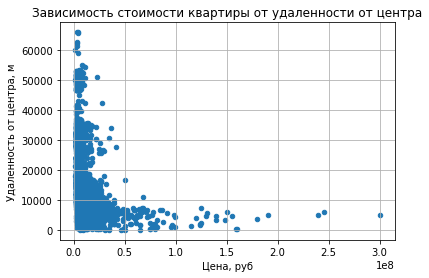

In [97]:
# диаграмма рассеяния
df.plot(x='last_price', y='city_сenters_nearest', kind='scatter', grid=True)
plt.xlabel('Цена, руб')
plt.ylabel('Удаленность от центра, м')
plt.title('Зависимость стоимости квартиры от удаленности от центра')
plt.show()

##### 4.4.1.1 Вывод
Зависимость цены от удаленности от центра не наблюдается.

#### 4.4.2 Зависимость от этажа

In [98]:
# добавление столбца с данными о категории этажа квартиры
df['floor_type_int'] = df.apply(floor_type_int, axis=1)

In [99]:
df['floor_type_int'].value_counts()

2    14277
3     2603
1     2264
Name: floor_type_int, dtype: int64

In [100]:
df.pivot_table(index='floor_type_int', values='last_price', aggfunc=['median', 'mean'])

,median,mean
,last_price,last_price
floor_type_int,,
1,4050000,4.873737e+06
2,5000000,6.643798e+06
3,4500000,6.633128e+06


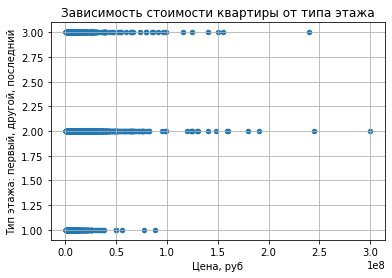

In [101]:
# диаграмма рассеяния
df.plot(x='last_price', y='floor_type_int', kind='scatter', grid=True)
plt.xlabel('Цена, руб')
plt.ylabel('Тип этажа: первый, другой, последний')
plt.title('Зависимость стоимости квартиры от типа этажа')
plt.show()

##### 4.4.2.1 Вывод
**Есть зависимости цены от этажа.** Первый этаж в среднем имеет стоимость ниже, чем остальные этажи. Последний этаж дороже, чем первый, но в среднем дешевле, чем другие этажи.

#### 4.4.3 Зависимость от даты размещения

##### 4.4.3.1 Зависимость от дня недели

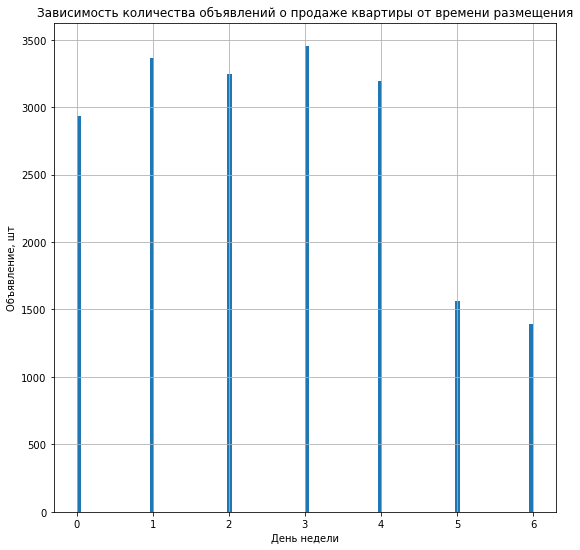

In [102]:
# гистограмма дня недели
df['first_day_exposition'].dt.weekday.hist(bins=100, figsize=(9, 9))
plt.xlabel('День недели')
plt.ylabel('Объявление, шт')
plt.title('Зависимость количества объявлений о продаже квартиры от времени размещения')
plt.show()

In [103]:
# корреляция
df['last_price'].corr(df['first_day_exposition'].dt.weekday)

0.0007821487924838832

###### 4.4.3.1.1 Вывод
Зависимости стоимости от дня недели нет. Также видим, что меньше всего размещенных объявлений в субботу и воскресенье.

##### 4.4.3.2 Зависимость от месяца

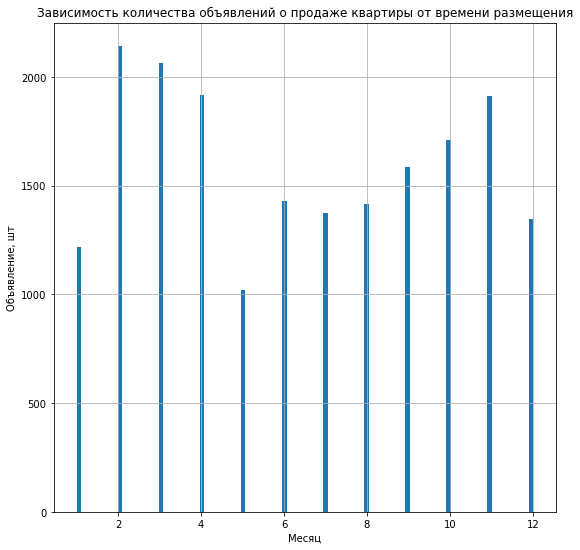

In [104]:
# гистограмма
df['first_day_exposition'].dt.month.hist(bins=100, figsize=(9, 9))
plt.xlabel('Месяц')
plt.ylabel('Объявление, шт')
plt.title('Зависимость количества объявлений о продаже квартиры от времени размещения')
plt.show()

In [105]:
# корреляция
df['last_price'].corr(df['first_day_exposition'].dt.month)

-0.001545595712409002

###### 4.4.3.2.1 Вывод
Зависимость стоимости от месяца нет. Также видим, что меньше всего размещенных объявлений в мае, январе и декабре. Скорее всего это связано с тем, что указанные месяцы по большей части являются праздничными. Больше всего объявлений в феврале, марте и ноябре.

##### 4.4.3.3 Зависимость от года

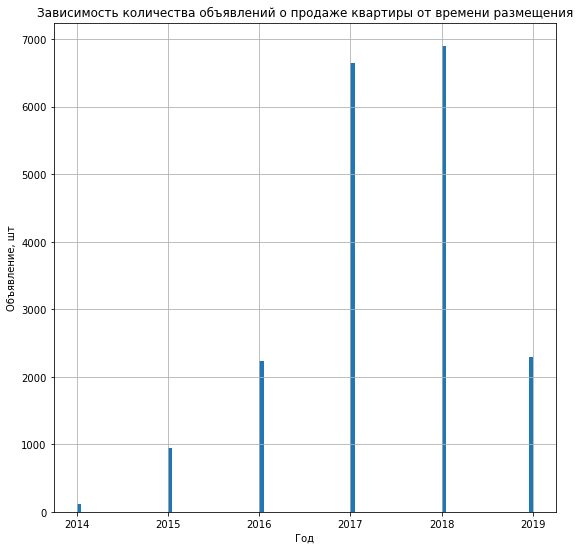

In [106]:
# гистограмма
df['first_day_exposition'].dt.year.hist(bins=100, figsize=(9, 9))
plt.xlabel('Год')
plt.ylabel('Объявление, шт')
plt.title('Зависимость количества объявлений о продаже квартиры от времени размещения')
plt.show()

In [107]:
# корреляция
df['last_price'].corr(df['first_day_exposition'].dt.year)

-0.0516017916445213

###### 4.4.3.3.1 Вывод
Зависимость стоимости от года нет. Но на гистограмме можно увидеть, как сервис Яндекс.Недвижимость набирал пользователей с течением времени. Пики пришли на 2017 и 2018. Падение в 2019 году, скорее всего, связано с тем, что в середине этого года данные были выгружены.

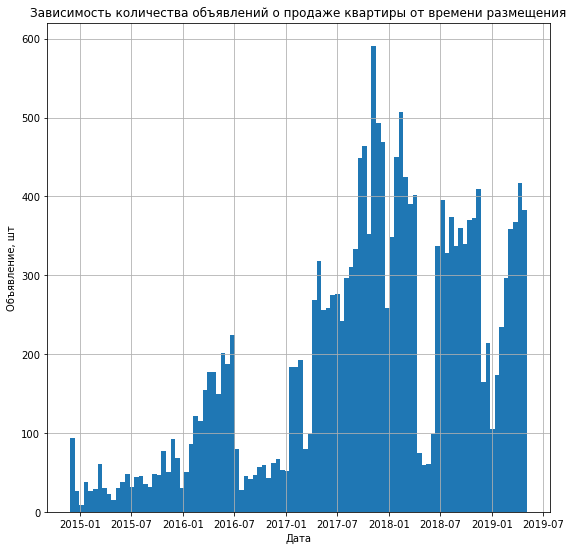

In [108]:
# гистограмма даты размещения
df['first_day_exposition'].hist(bins=100, figsize=(9, 9))
plt.xlabel('Дата')
plt.ylabel('Объявление, шт')
plt.title('Зависимость количества объявлений о продаже квартиры от времени размещения')
plt.show()

##### 4.4.3.4 Вывод
Зависимости цены от даты размещения, дня недели, месяца и года нет. Но выявили закономерности:

* Меньше всего размещенных объявлений в субботу и воскресенье.
* Меньше всего размещенных объявлений в мае, январе и декабре. Скорее всего это связано с тем, что указанные месяцы по большей части являются праздничными. Больше всего объявлений в феврале, марте и ноябре.
* Яндекс.Недвижимость начал набирать пользователей в 2014 году. Пики пришли на 2017 и 2018. Падение в 2019 году, скорее всего, связано с тем, что в середине этого года данные были выгружены.

#### 4.4.4 Вывод
Мы уже выяснили в п.4.1:
1. Существует **сильная зависимость между стоимостью квартиры и площадью**. Но чем выше значения, тем больше разброс.
2. Больше всего в выборке 1, 2 и 3 комнатных квартир. **Количество комнат имеет только среднее влияние на стоимость.**

Также выяснили, что:

4. **Зависимости цены квартиры от удаленности от центра не наблюдается.**
5. **Есть зависимости цены от этажа.** Первый этаж в среднем имеет стоимость ниже, чем остальные этажи. Последний этаж дороже, чем первый, но в среднем дешевле, чем другие этажи.
6. **Зависимости цены от даты размещения, дня недели, месяца и года не наблюдается.** Но выявили закономерности:

* Меньше всего размещенных объявлений в субботу и воскресенье.
* Меньше всего размещенных объявлений в мае, январе и декабре. Скорее всего это связано с тем, что указанные месяцы по большей части являются праздничными. Больше всего объявлений в феврале, марте и ноябре.
* Яндекс.Недвижимость начал набирать пользователей в 2014 году. Пики пришли на 2017 и 2018. Падение в 2019 году, скорее всего, связано с тем, что в середине этого года данные были выгружены.

### 4.5 Населенные пункты

In [109]:
# 10 населенных пунктов с наибольшим числом объявлений
df['locality_name'].value_counts().head(10)

Санкт-Петербург      13003
посёлок Мурино         396
посёлок Шушары         372
Всеволожск             326
Колпино                289
Пушкин                 250
деревня Кудрово        240
посёлок Парголово      230
Гатчина                210
Выборг                 186
Name: locality_name, dtype: int64

In [110]:
# список с 10 населенными пунктами с наибольшим числом объявлений
df_filtered_locality_list = [
    'Санкт-Петербург',
    'посёлок Мурино',
    'посёлок Шушары',
    'Всеволожск',
    'Колпино',
    'Пушкин',
    'Гатчина',
    'деревня Кудрово',
    'посёлок Парголово',
    'Выборг'
]

In [111]:
# датафрейм с данными о 10 населенных пунктах с наибольшим числом объявлений
df_filtered_locality = df[df['locality_name'].isin(df_filtered_locality_list)]

In [112]:
# данные о самой низкой и высокой цене квадратного метра жилья
df_filtered_locality.pivot_table(index='locality_name', values='price_square_meter', aggfunc=['count', 'mean']).astype(int)


,count,mean
,price_square_meter,price_square_meter
locality_name,,
Всеволожск,326,69624
Выборг,186,58692
Гатчина,210,69661
Колпино,289,76152
Пушкин,250,106376
Санкт-Петербург,13003,113764
деревня Кудрово,240,92488
посёлок Мурино,396,84775


In [113]:
df_filtered_locality_2 = (df.pivot_table(index='locality_name', values='price_square_meter',
            aggfunc=['mean', 'count'])
            .reset_index())

# переименуем столбцы для лучшего восприятия
df_filtered_locality_2.columns = ['locality_name', 'mean_price_per_meter', 'number_for_sale']
df_filtered_locality_2.nlargest(10,'number_for_sale').sort_values(by=['number_for_sale','mean_price_per_meter'], ascending=False)

,locality_name,mean_price_per_meter,number_for_sale
33,Санкт-Петербург,113764.827575,13003
272,посёлок Мурино,84775.937915,396
305,посёлок Шушары,77485.736810,372
3,Всеволожск,69624.387567,326
13,Колпино,76152.851636,289
32,Пушкин,106376.659510,250
90,деревня Кудрово,92488.547205,240
277,посёлок Парголово,89112.421904,230
6,Гатчина,69661.137730,210
4,Выборг,58692.474162,186


#### 4.5.1 Вывод
Населенные пункты с самым большим числом объявлений:
* Санкт-Петербург
* посёлок Мурино
* посёлок Шушары
* Всеволожск
* Колпино
* Пушкин
* Гатчина
* деревня Кудрово
* посёлок Парголово
* Петергоф

Из них **в Санкт-Петербург ожидаемая самая дорогая недвижимость** — средняя стоимость квадратного метра 112 596 руб.
**Самая дешевая недвижимость в Выборге** — средняя стоимость квадратного метра 54 485 руб.

### 4.6 Санкт-Петербург

#### 4.6.1 Общий анализ

In [114]:
# создание датафейрма с объявлениями в Санкт-Петербурге
df_sp = df.query("locality_name == 'Санкт-Петербург' and city_сenters_nearest > 0")

In [115]:
# перевод расстояния из метров в километры и изменение типа в 'int'
df_sp['city_сenters_nearest'] = (df_sp['city_сenters_nearest'] / 1000).astype(int)

C:\Users\csvic\AppData\Local\Temp/ipykernel_11400/411279201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['city_сenters_nearest'] = (df_sp['city_сenters_nearest'] / 1000).astype(int)


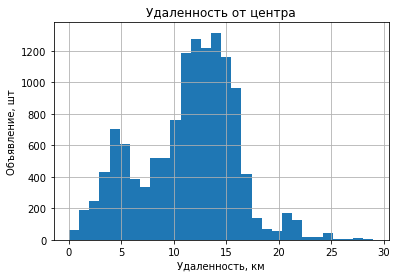

In [116]:
# гистограмма удаленности от центра
df_sp['city_сenters_nearest'].hist(bins=30)
plt.xlabel('Удаленность, км')
plt.ylabel('Объявление, шт')
plt.title('Удаленность от центра')
plt.show()

In [117]:
# корреляция между удаленностью от центра и стоимостью квадратного метра квартиры в Санкт-Петербурге
df_sp['city_сenters_nearest'].corr(df['price_square_meter'])

-0.33245508634314425

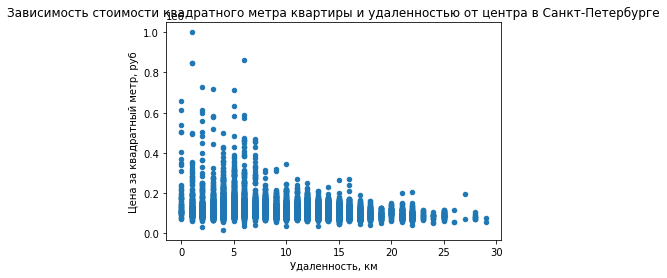

In [118]:
# диаграмма рассеяния между удаленностью от центра и стоимостью квадратного метра квартиры в Санкт-Петербурге
df_sp.plot(x='city_сenters_nearest', y='price_square_meter', kind='scatter')
plt.xlabel('Удаленность, км')
plt.ylabel('Цена за квадратный метр, руб')
plt.title('Зависимость стоимости квадратного метра квартиры и удаленностью от центра в Санкт-Петербурге')
plt.show()

##### 4.6.1.1 Вывод

1. Создали датафрейм с данными только по Санкт-Петербургу с удаленность от центра больше нуля (это были пропущенные значения).
2. Корреляция между удаленностью от центра и стоимостью квадратного метра квартиры в Санкт-Петербург низкая. И чем ближе к центру, тем больший разброс значений.

#### 4.6.2 Анализ центральной части Санкт-Петербурга

In [119]:
# создание датафрейма с объявлениями в центре Санкт-Петерурга
# примем за центр расстрояние до 6 км от центра
# на гистограмме видим пик в районе 5 км и далее спад и опять пик
# спад вероятно показывает промышленные зоны, которые начинаются после центра и заканчиваются спальными районами
df_sp_center = df_sp.query('city_сenters_nearest < 6')

In [120]:
# создание датафейрма с параметрами по площади, цене, количеству комнат и высоте полотков
df_sp_center = df_sp_center[['city_сenters_nearest', 'last_price', 'price_square_meter', 'total_area', 'rooms', 'ceiling_height']]

In [121]:
# корреляция параметров
df_sp_center.corr()

,city_сenters_nearest,last_price,price_square_meter,total_area,rooms,ceiling_height
city_сenters_nearest,1.000000,-0.051642,-0.059220,-0.045099,-0.088281,-0.184446
last_price,-0.051642,1.000000,0.712532,0.712468,0.368116,0.161362
price_square_meter,-0.059220,0.712532,1.000000,0.211388,-0.044703,0.061040
total_area,-0.045099,0.712468,0.211388,1.000000,0.754909,0.230893
rooms,-0.088281,0.368116,-0.044703,0.754909,1.000000,0.195393
ceiling_height,-0.184446,0.161362,0.061040,0.230893,0.195393,1.000000


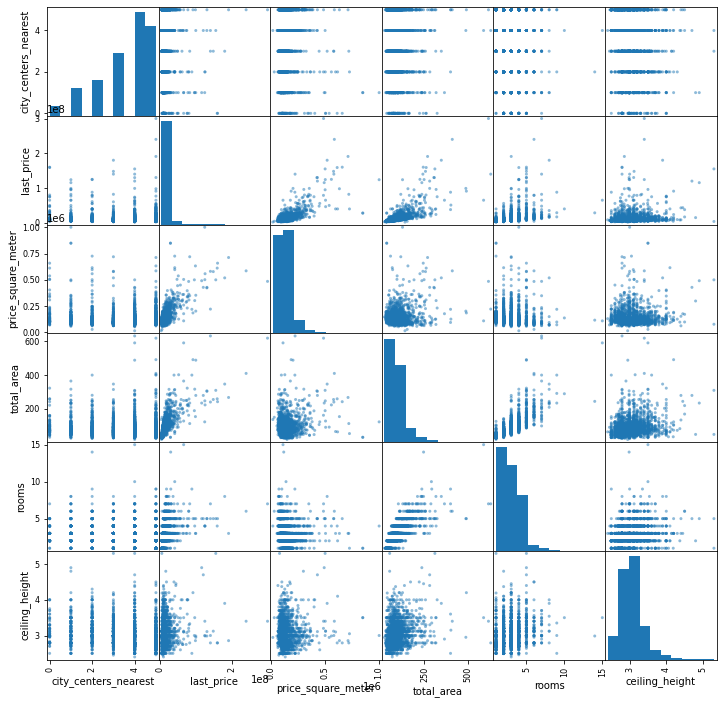

In [122]:
# матрица гистаграмм рассеяния параметров
pd.plotting.scatter_matrix(df_sp_center, figsize=(12, 12))
plt.show()

##### 4.6.2.1 Вывод

1. Создали датафрейм только с объявлениями в центре Санкт-Петербурга. В центральную область включили удаленность до 6 км от центра. Это связано с тем, что на гистограмме удаленности есть пик в районе 5 км, далее спад и опять пик. Спад вероятно показывает промышленные зоны, которые начинаются после центра и заканчиваются спальными районами.

2. Проверили корреляцию параметров и выявили связи:
* Нет связи между удаленностью от центра и параметрами: стоимость жилья, цена за квадратный метр, общая площадь, количество комнат и высота потолков.
* Сильная зависимость наблюдается между:
    * стоимостью жилья и стоимостью квадратного метра жилья (также как во всей выборке),
    * стоимостью жилья и общей площадью (также как во всей выборке),
    * общей площадью и количеством комнат (также как во всей выборке).

## 5. Общий вывод

### Задача исследования: **установить параметры, которые позволят построить автоматизированную систему**, которая отследит аномалии и мошенническую деятельность.

Выделили следующие данные:
1. Сильная зависимость между стоимостью квартиры и общей площадью. Но чем выше стоимость и площадь, тем больший разброс в данных.
2. Некоторые параметры показали среднее отклонение почти равно или больше среднего значения. Необходимо категоризировать данные и изучать цены на квадратный метр в совокупности с другими параметрами, например, районом, удаленностью от центра города и др.
3. Прямая зависимость между общей и жилой площадью. На крайних значения есть разброс в данных.
4. Были найдены ошибки в данных человеческого характера: неправильно заполненные количественные значения (высота потолка, жилая площадь, стоимость и тд). Это были редкие ошибки.
5. Меньше всего размещенных объявлений в субботу и воскресенье.
6. Меньше всего размещенных объявлений в мае, январе и декабре. Скорее всего это связано с тем, что указанные месяцы по большей части являются праздничными. Больше всего объявлений в феврале, марте и ноябре.
7. Самая высокая стоимость квадратного метра жилья в Санкт-Петербурге: 112 596 руб.
8. При анализе корреляций параметров в Санкт-Петербурге не найдено уникальных данных — зависимости между параметрами такие же, как в остальной выборке.

**Среди аномалий выделено одно наблюдение:**

Есть 2 больших выброса в количестве дней, за который продалась квартира — 45 и 60 дней, при том, что среднее значение 131 день и медиана 85 дней.  На распределении выбросы сильно выделяются на фоне остальных данных. Возможно люди/агенты размещают квартиру и через строгое количество дней удаляют объявление. (Возможно это автоматическое удаление, но я не нашла информации об этом).

Также следует обратиться к разработчикам и уточнить вопрос по картографически данным, в связи с чем много пропусков.
Стоит обратить внимание также на пропуски в данных о высоте потолков и площади кухни.